# **Exploratory data analysis**

## **Importing the necessary libraries**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
%matplotlib inline

## **Loading the datasets**

In [88]:
books_df = pd.read_csv('data/Books.csv', encoding='ISO-8859-1')
ratings_df = pd.read_csv('data/Ratings.csv', encoding='ISO-8859-1')
users_df = pd.read_csv('data/Users.csv', encoding='ISO-8859-1')

In [89]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### **Book Dataset Columns:**

- **SBN**: A unique identifier for each book, typically used to track and reference books in databases and libraries.
- **Book-Title**: The title of the book.
- **Book-Author**: The author(s) of the book, indicating the writer(s) responsible for the content.
- **Year-Of-Publication**: The year when the book was officially published.
- **Publisher**: The publishing company responsible for the book's distribution.
- **Image-URL-S**: URL for the small-sized image of the book's cover.
- **Image-URL-M**: URL for the medium-sized image of the book's cover.
- **Image-URL-L**: URL for the large-sized image of the book's cover.

In [90]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### **Ratings Dataset Columns:**

- **User-ID**: A unique identifier for each user who has rated a book.
- **ISBN**: The unique identifier for a book, used to reference the specific book rated by the user.
- **Book-Rating**: The rating given by the user for a specific book, typically on a scale (e.g., 1-5 or 1-10).

In [91]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### **Users Dataset Columns:**

- **User-ID**: A unique identifier for each user in the dataset.
- **Location**: The geographical location (e.g., city, state, or country) of the user.
- **Age**: The age of the user, representing the user's age at the time of data collection.

In [92]:
#Defining the datasets
datasets = {'Books': books_df, 'Ratings': ratings_df, 'Users': users_df}

## **Shapes of the datasets**

In [93]:
for name, df in datasets.items():
    print(f"{name} Dataset Shape: {df.shape}")

Books Dataset Shape: (271360, 8)
Ratings Dataset Shape: (1149780, 3)
Users Dataset Shape: (278858, 3)


### **Findings:**

- **Ratings Dataset**: Contains more records than the `Users` and `Books` datasets, indicating that users may have rated multiple books.
- **Books Dataset**: Has fewer records than the `Ratings` dataset, suggesting that many ratings correspond to the same book.
- **Users Dataset**: Has fewer records than the `Ratings` dataset, confirming that users have rated multiple books.

## **Dataset Info**

In [94]:
for name, df in datasets.items():
    print(f"\n===== {name} Dataset Info =====")
    df.info()
    print('-'*60)


===== Books Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
------------------------------------------------------------

===== Ratings Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      114978

### **Findings:**

- **Books Dataset**: 271,360 entries, 8 columns. Some missing values in **Book-Author**, **Publisher**, and **Image-URL-L**.
- **Ratings Dataset**: 1,149,780 entries, 3 columns. No missing values.
- **Users Dataset**: 278,858 entries, 3 columns. **Age** has missing values for 110,762 users.

## **Null values**

In [95]:
for name, df in datasets.items():
    print(f"{name} Dataset's NUll values count:")
    print(df.isnull().sum())
    print('-'*60)

Books Dataset's NUll values count:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
------------------------------------------------------------
Ratings Dataset's NUll values count:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
------------------------------------------------------------
Users Dataset's NUll values count:
User-ID          0
Location         0
Age         110762
dtype: int64
------------------------------------------------------------


In [96]:
for name, df in datasets.items():
    print(f"\n{name} Dataset - Percentage of Null Values:")
    null_percentage = (df.isnull().mean() * 100).round(2)   # Calculates and rounds to 2 decimal places
    null_percentage = null_percentage.astype(str) + ' %'
    print(null_percentage)
    print('-' * 60)


Books Dataset - Percentage of Null Values:
ISBN                   0.0 %
Book-Title             0.0 %
Book-Author            0.0 %
Year-Of-Publication    0.0 %
Publisher              0.0 %
Image-URL-S            0.0 %
Image-URL-M            0.0 %
Image-URL-L            0.0 %
dtype: object
------------------------------------------------------------

Ratings Dataset - Percentage of Null Values:
User-ID        0.0 %
ISBN           0.0 %
Book-Rating    0.0 %
dtype: object
------------------------------------------------------------

Users Dataset - Percentage of Null Values:
User-ID       0.0 %
Location      0.0 %
Age         39.72 %
dtype: object
------------------------------------------------------------


- The **Age** feature in the Users dataset has **a large number of missing values (~40%)**, making direct imputation unreliable.  
- Instead of predicting exact ages, we will **categorize users into age groups (bins)** to reduce bias and improve consistency.  
- This approach ensures that the dataset remains usable while maintaining meaningful patterns in user demographics.  

---

## **Spliting the Location feature in user dataset in state,city,country**

In [97]:
users_df.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


- In some records 'n/a' is also present in the location feature
- We will handle this values as well
- We will replace them with a empty string

In [98]:
# Function to extract City, State, and Country
def extract_location(location):
    parts = [part.strip() for part in str(location).split(',')]
    
    # Assign default empty values
    city, state, country = "", "", ""

    # Extract based on available parts
    if len(parts) == 3:
        city, state, country = parts
    elif len(parts) == 2:
        city, state, country = parts[0], "", parts[1]
    elif len(parts) == 1:
        city = parts[0]

    # Handling cases where 'n/a' appears in the state field
    if state.lower() == "n/a":
        state = ""

    return pd.Series([city, state, country])

In [99]:
users_df[['City', 'State', 'Country']] = users_df['Location'].apply(extract_location)

In [100]:
users_df.head()

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


- Now the location feature is no longer required as we have extracted the city,state and country already
- We will drop the location feature

In [101]:
users_df.drop('Location',  axis= 1 , inplace= True)

In [102]:
users_df.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


## **For null values of User dataset**

## **Plots between age wrt different cities, state and country**

- We will see if their is any pattern their

In [103]:
df = users_df.copy()

### **Distribution of age**

In [104]:
# Removing invalid ages (assuming valid age range is 5-100)
df = df[(df['Age'] >= 5) & (df['Age'] <= 100) | df['Age'].isna()]

In [105]:
def plot_age_distribution(df):
    """
    Plots the distribution of Age with enhanced visualization.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
    """
    sns.set_style("whitegrid")  
    plt.figure(figsize=(10, 6))

    sns.histplot(df['Age'].dropna(), bins=30, kde=True, 
                 color='#0073e6', edgecolor='black', alpha=0.8)

    plt.title("Distribution of Age", fontsize=14, fontweight='bold', color='#333333')
    plt.xlabel("Age", fontsize=12, fontweight='bold', color='#555555')
    plt.ylabel("Count", fontsize=12, fontweight='bold', color='#555555')
    plt.xticks(fontsize=10, color='#444444')
    plt.yticks(fontsize=10, color='#444444')
    sns.despine()
    plt.show()

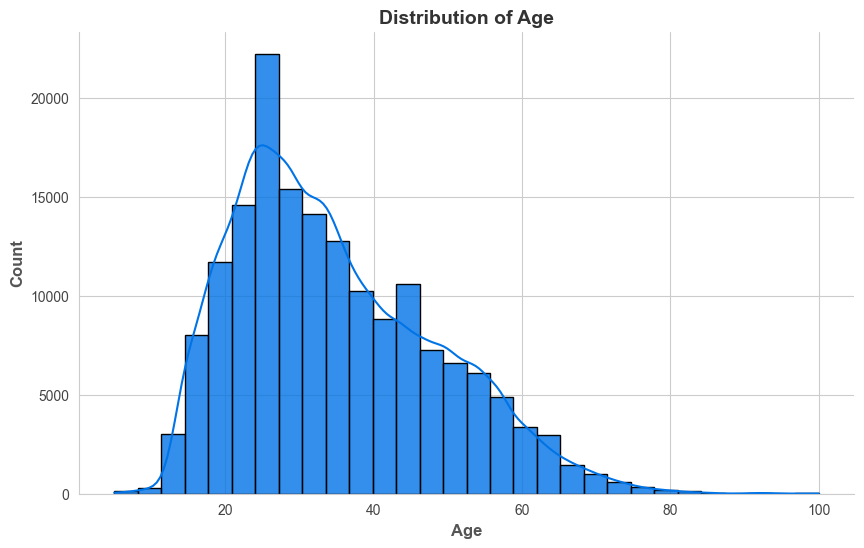

In [106]:
plot_age_distribution(df= df)

### **Insights from Age Distribution**

- The age distribution is **right-skewed**, indicating more younger users than older users.  
- A **peak is observed around 20-25 years**, suggesting a higher concentration of users in this age range.  
- The count gradually decreases as age increases, with fewer users above 60 years.  
- There is a noticeable dip around **45-50 years**, which could indicate lower user engagement in that age group.  
- The **kde curve** helps visualize the overall trend, showing a smooth decline after the peak.  
---


### **Boxplot of Age by Country (Top 10 countries by count)**|

In [107]:
# Boxplot of Age by Country (Top 10 countries by count)
def plot_age_distribution_by_country(df, top_n=10):
    """
    Plots a box plot of Age distribution for the top N countries.

    Parameters:
    df (DataFrame): The dataset containing 'Country' and 'Age' columns.
    top_n (int): The number of top countries to display based on frequency.

    Returns:
    None
    """
    top_countries = df['Country'].value_counts().index[:top_n]
    filtered_df = df[df['Country'].isin(top_countries)]

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    ax = sns.boxplot(x="Country", y="Age", data=filtered_df, palette="viridis")

    #Displays median values on each box plot figure
    medians = filtered_df.groupby(["Country"])["Age"].median()
    for i, median in enumerate(medians):
        ax.text(i, median, f'{median:.0f}', horizontalalignment='center', 
                verticalalignment='center', fontdict={'size': 12, 'weight': 'bold'}, color='cyan')

    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title("Age Distribution by Country", fontsize=14, fontweight="bold")
    plt.xlabel("Country", fontsize=12)
    plt.ylabel("Age", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

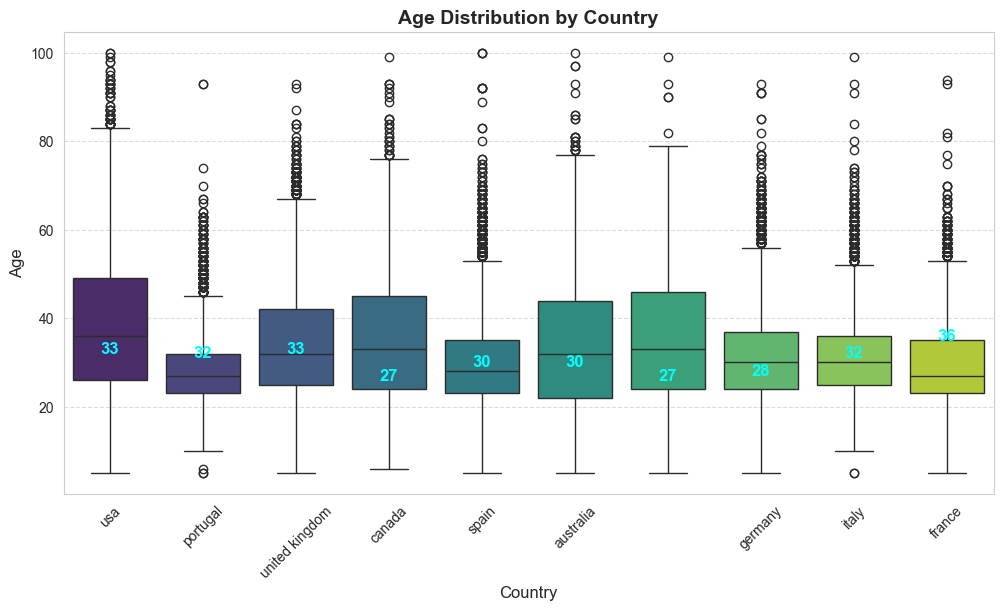

In [108]:
plot_age_distribution_by_country(df=df)

### **Insights from Age Distribution by Country**

- **Median Age Differences**: The median age varies across countries, with some showing a significantly higher median (e.g., **France: 36**, **USA: 33**).
- **Age Spread**: Countries like the **USA, UK, and Australia** have a wider interquartile range, indicating greater age variability.
- **Outliers**: Multiple countries exhibit a high number of outliers, particularly in the older age group (80+ years).
- **Compact Distributions**: Some countries, such as **Portugal and Italy**, have a more compact distribution with a lower variance in ages.

---


### **Boxplot of Age by State (Top 10 states by count)**

In [109]:
# Boxplot of Age by State (Top 10 states by count)
def plot_age_distribution_by_state(df, top_n=10):
    """
    Plots a box plot of Age distribution for the top N countries.

    Parameters:
    df (DataFrame): The dataset containing 'Country' and 'Age' columns.
    top_n (int): The number of top countries to display based on frequency.

    Returns:
    None
    """
    top_state = df['State'].value_counts().index[:top_n]
    filtered_df = df[df['State'].isin(top_state)]

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    ax = sns.boxplot(x="State", y="Age", data=filtered_df, palette="viridis")

    #Displays median values on each box plot figure
    medians = filtered_df.groupby(["State"])["Age"].median()
    for i, median in enumerate(medians):
        ax.text(i, median, f'{median:.0f}', horizontalalignment='center', 
                verticalalignment='center', fontdict={'size': 12, 'weight': 'bold'}, color='cyan')

    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title("Age Distribution by State", fontsize=14, fontweight="bold")
    plt.xlabel("State", fontsize=12)
    plt.ylabel("Age", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

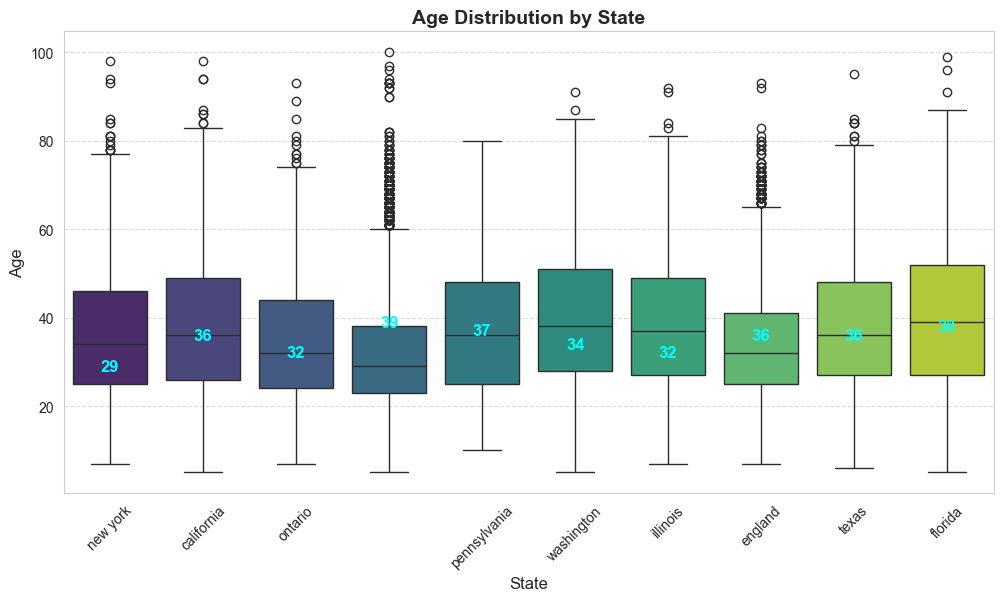

In [110]:
plot_age_distribution_by_state(df= df)

### **Insights from Age Distribution by State**

- **Median Age Variation**: States like **California, England, Texas, and Florida** have a median age of **36**, while **New York has the lowest median (29)**.
- **Wider Age Distribution**: **New York, California, and Florida** show a larger spread in ages, indicating a more diverse age group.
- **Presence of Outliers**: Multiple states exhibit a significant number of older individuals (80+ years), especially in **California, Illinois, and Florida**.
- **Balanced Distributions**: **Washington and Ontario** have a relatively compact interquartile range, suggesting less age variability.
---

### **Boxplot of Age by City (Top 10 cities by count)**

In [111]:
# Boxplot of Age by city (Top 10 cities by count)
def plot_age_distribution_by_city(df, top_n=10):
    """
    Plots a box plot of Age distribution for the top N countries.

    Parameters:
    df (DataFrame): The dataset containing 'Country' and 'Age' columns.
    top_n (int): The number of top countries to display based on frequency.

    Returns:
    None
    """
    top_city = df['City'].value_counts().index[:top_n]
    filtered_df = df[df['City'].isin(top_city)]

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    ax = sns.boxplot(x="City", y="Age", data=filtered_df, palette="viridis")

    #Displays median values on each box plot figure
    medians = filtered_df.groupby(["City"])["Age"].median()
    for i, median in enumerate(medians):
        ax.text(i, median, f'{median:.0f}', horizontalalignment='center', 
                verticalalignment='center', fontdict={'size': 12, 'weight': 'bold'}, color='cyan')

    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title("Age Distribution by City", fontsize=14, fontweight="bold")
    plt.xlabel("City", fontsize=12)
    plt.ylabel("Age", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

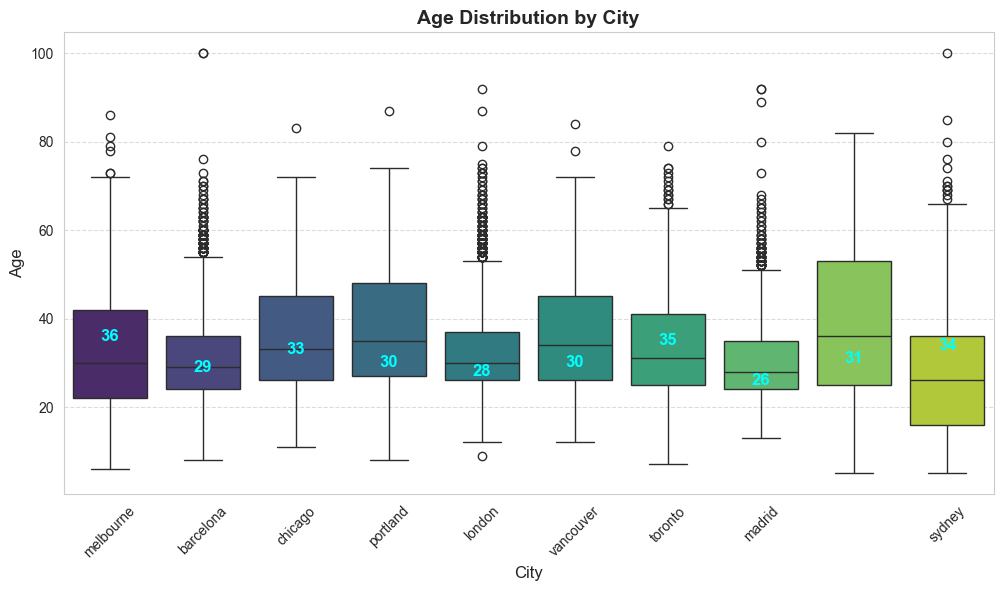

In [112]:
plot_age_distribution_by_city(df= df)

## **Analysis Report: Age Distribution and Missing Values**

### **Key Observations**
- **Age has 40% missing values**, making direct imputation challenging.
- **Country/State shows no strong correlation** with age, making them unreliable for filling missing values.
- Wide age variability within each country/state further limits their usefulness for imputation.

### **Proposed Approach**
- **Merge with book and rating datasets** to explore relationships with user preferences.
- **Analyze book preferences and rating trends** as potential predictors for missing age values.
- Consider **binning ages into groups** (e.g., teens, young adults, middle-aged, seniors) to simplify analysis and reduce imputation complexity.

This approach ensures a **data-driven strategy** rather than relying on weak correlations.

---


## **For null values of Book Dataset**

In [113]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [114]:
books_df.shape

(271360, 8)

- In the datatset of 2.7 lakh records 2,3 nan values won't make that difference
- So we will replace them with empty strings

In [115]:
books_df['Book-Author'].fillna(value= "",inplace= True)
books_df['Publisher'].fillna(value= "",inplace= True)
books_df['Image-URL-L'].fillna(value="",inplace=True)

In [116]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

- Successfully filled nan values

### **Removing the unnecessary features**

- The image urls won't be that useful in Eda process
- But we will use them in deployment process in future to diplay image on our UI

In [117]:
cleaned_books_df = books_df.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'])

In [118]:
cleaned_books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [119]:
cleaned_books_df['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1897        1
2024        1
1376        1
1926        1
2037        1
Name: count, Length: 202, dtype: int64

In [120]:
cleaned_books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

### **Data Cleaning Insights for "Year of Publication"**

- Some years are stored as **strings** (e.g., `'2000'`, `'1995'`). Convert them to integers.
- Some entries are **clearly incorrect**, such as:
  - **Years in the future**: `2050`, `2030`, `2026`, etc.
  - **Years before the printing press**: `1806`, `1378`, `1376`
  - **Non-numeric values**: `"DK Publishing Inc"`, `"Gallimard"`
  - **Years as 0**

### **Records where the year of publication is marked as 0**

In [121]:
cleaned_books_df[cleaned_books_df['Year-Of-Publication'] == '0']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
196656,3442035368,Ich Gestehe,Heinz G. Konsalik,0,Wilhelm Goldmann Verlag GmbH
196678,0553124803,Being There,Jerzy Kosinski,0,Bantam Doubleday Dell
196680,888274387X,Vaniglia E Cioccolato,Modignani Casati,0,Sperling Paperback
196685,033368155X,Surreal Lives the Surrealists 1945,Ruth Brandon,0,Humanity Press/prometheus Bk
196734,0207158452,Games of the Strong,Glenda Adams,0,Harpercollins Publisher
...,...,...,...,...,...
261929,0760700702,100 Great Archaeological Discoveries,Paul G Bahn,0,Barnes Noble Inc
261930,0760701962,UFO's: A Scientific Debate,Carl Sagan,0,Barnes Noble Books
261931,0760706379,Only Way to Cross,John Maxtone Graham,0,Barnes Noble
262120,0880292288,New York Times Guide to Reference Materials,Mona Mccormick,0,Dorset House Publishing Co Inc


- **1048** records have the year of publication as 0

In [122]:
cleaned_books_df['Publisher'].unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      shape=(16808,), dtype=object)

### **Some more incorrect enteries**

In [123]:
cleaned_books_df[cleaned_books_df['Year-Of-Publication'] =='DK Publishing Inc' ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [124]:
cleaned_books_df[cleaned_books_df['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [125]:
# Convert string years to numeric
cleaned_books_df['Year-Of-Publication'] = pd.to_numeric(cleaned_books_df['Year-Of-Publication'], errors='coerce') #enteries which are not numeric will we stored as Nan

In [126]:
cleaned_books_df['Year-Of-Publication']

0         2002.0
1         2001.0
2         1991.0
3         1999.0
4         1999.0
           ...  
271355    1988.0
271356    1991.0
271357    2004.0
271358    1996.0
271359    2000.0
Name: Year-Of-Publication, Length: 271360, dtype: float64

In [127]:
# Replace out-of-range values
cleaned_books_df.loc[(cleaned_books_df['Year-Of-Publication'] < 1800) | (cleaned_books_df['Year-Of-Publication'] > 2025), 'Year-Of-Publication'] = None

In [128]:
cleaned_books_df['Year-Of-Publication'].isnull().sum()

np.int64(4635)

In [129]:
cleaned_books_df['Year-Of-Publication'].median()

np.float64(1996.0)

In [130]:
def plot_year_boxplot(years):
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=years, color='skyblue', width=0.5)
    
    median = years.median()
    plt.axvline(median, color='red', linestyle='--', label=f'Median: {median}')
    
    plt.xlabel("Year of Publication", fontsize=12)
    plt.title("Boxplot of Year of Publication", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.show()

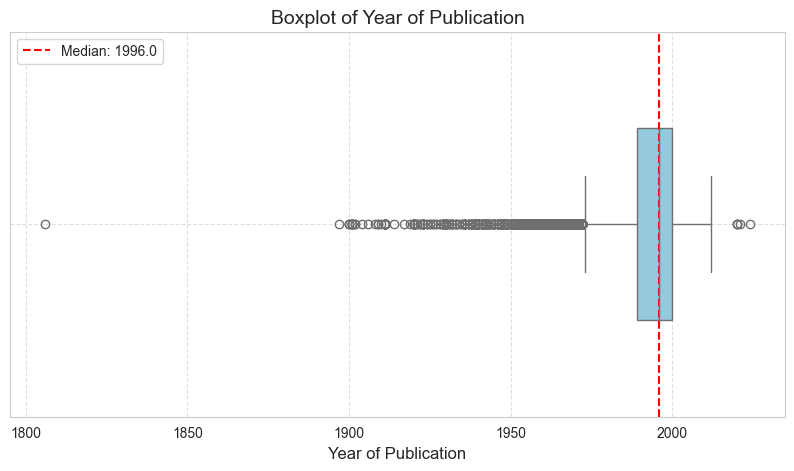

In [131]:
plot_year_boxplot(years= cleaned_books_df['Year-Of-Publication'])

### **Insights from the Boxplot of Year of Publication**

- **Median Year of Publication:** The median is **1996**, indicating that half of the books were published before this year.
- **Outliers:** 
  - Books published **before 1900** are considered outliers.
  - A few books published in the **1800s** are extreme outliers.
- **Data Distribution:** 
  - Most books were published between **1950 and 2000**.
  - The interquartile range (IQR) suggests that the majority of books fall within this period.
- **Possible Data Issues:** 
  - Some books have unrealistic publication years (e.g., very old entries).
  - Filtering or adjusting extreme outliers may be necessary for better analysis.

---


- We will replace the nan values with the meadian value

In [133]:
median_year = cleaned_books_df['Year-Of-Publication'].median()
cleaned_books_df['Year-Of-Publication'].fillna(median_year, inplace=True)


In [135]:
cleaned_books_df['Year-Of-Publication'].isnull().sum()

np.int64(0)